In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
import os
import seaborn as sns
import utils as uu
import sklearn
import sklearn.metrics
import sklearn.cluster
import sklearn.linear_model
import scipy
import scipy.stats

In [3]:
splits_df = pd.read_csv('data/mj_splits_training_testing.csv')
labels    = np.repeat(np.array(splits_df['label']), 2)
training  = np.repeat(np.array(splits_df['training']), 2)
names     = np.repeat(np.array(splits_df['subject']), 2)
#indices = np.array([ 7,  8, 82, 42, 17, 51, 75, 20, 43, 15,  1, 52, 63, 59, 33, 50, 86, 31,  2, 45])


In [300]:
train_file = np.load("data/standard_fcs_labels_training.npz")

labels = train_file["labels"]
inputs = train_file["standard_fcs"]

len(labels), inputs.shape

(646, (646, 4005))

In [301]:
x_train, x_test = inputs[training == 1], inputs[training == 0]
y_train, y_test = labels[training == 1], labels[training == 0]

In [124]:
lbda = 30
ridge_regressor = sklearn.linear_model.SGDClassifier(loss="log_loss", penalty=None, alpha=1/(lbda), random_state=1)
#ridge_regressor = sklearn.linear_model.RidgeClassifier(lbda, random_state=1)

In [125]:
ridge_regressor.fit(x_train, y_train)

SGDClassifier(alpha=0.03333333333333333, loss='log_loss', penalty=None,
              random_state=1)

In [126]:
ridge_regressor.score(x_test, y_test)

0.7384615384615385

In [127]:
ridge_regressor.predict_proba(x_test).shape

(130, 2)

0.820759368836292

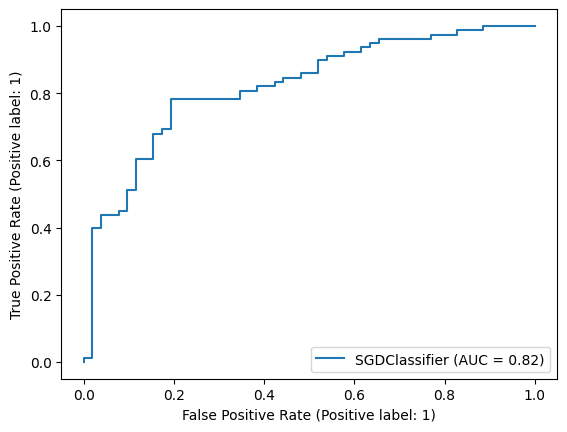

In [128]:
auc_dat = sklearn.metrics.RocCurveDisplay.from_estimator(ridge_regressor, x_test, y_test)
auc_dat.roc_auc

In [129]:
from tqdm import tqdm
from scipy.stats import norm
import scipy.stats as stats

def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in tqdm(range(n)):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    print(ans)
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    print(np.diag(vcov))
    p = (1 - norm.cdf(abs(t))) * 2
    return p

def get_pvals(lm, X, y):
    params = np.append(lm.intercept_,lm.coef_)
    predictions = lm.predict(X)
    new_X = np.append(np.ones((len(X),1)), X, axis=1)
    M_S_E = (sum((y-predictions)**2))/(len(new_X)-len(new_X[0]))
    v_b = M_S_E*(np.linalg.inv(np.dot(new_X.T,new_X)).diagonal())
    s_b = np.sqrt(v_b)
    t_b = params/ s_b
    p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_X)-len(new_X[0])))) for i in t_b]
    
    return p_val

In [130]:
logs = get_pvals(ridge_regressor, x_train[:4], y_train[:4])
logs

/var/folders/24/mpw62vn54110sf_ggs3n3ry40000gn/T/ipykernel_72655/3426482048.py:35: RuntimeWarning: divide by zero encountered in true_divide
  t_b = params/ s_b


[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [131]:
import statsmodels.api as sms

In [189]:
x_train.shape

(516, 4005)

In [188]:
model = sms.OLS(y_train, x_train[:, :515]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.819
Method:                 Least Squares   F-statistic:                              5.519
Date:                Fri, 04 Aug 2023   Prob (F-statistic):                       0.329
Time:                        13:43:14   Log-Likelihood:                          1449.4
No. Observations:                 516   AIC:                                     -1869.
Df Residuals:                       1   BIC:                                      317.9
Df Model:                         515                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -13.7253     16.931     -0.811      0.566    -228.853     201.402
x2            25.0899     55.199      0.455      0.728    -676.283     726.463
x3             7.3552      8.765      0.839      0.556    -104.016     118.727
x4            24.1286     39.333      0.613      0.650    -475.642     523.899
x5           -21.4446     46.461     -0.462      0.725    -611.787     568.898
x6           -26.0737     44.850     -0.581      0.665    -595.947     543.800
x7            38.9912     73.409      0.531      0.689    -893.761     971.743
x8            -8.0921     22.382     -0.362      0.779    -292.477     276.293
x9             7.9316     40.756      0.195      0.878    -509.928     525.791
x10           11.2369     14.934      0.752      0.589    -178.514     200.988
x11           20.0853     32.825      0.612      0.650    -396.998     437.169
x12           24.1989     50.250      0.482      0.714    -614.282     662.680
x13           -2.2838     14.423     -0.158      0.900    -185.547     180.980
x14           13.6259     23.389      0.583      0.664    -283.556     310.808
x15          -58.7208    116.597     -0.504      0.703   -1540.228    1422.787
x16           34.8031     61.948      0.562      0.674    -752.321     821.928
x17           55.3856    113.868      0.486      0.712   -1391.442    1502.213
x18          -51.6748    114.604     -0.451      0.730   -1507.856    1404.506
x19           15.9159     34.909      0.456      0.728    -427.648     459.480
x20          -30.8580     66.339     -0.465      0.723    -873.774     812.058
x21          -16.5797     59.044     -0.281      0.826    -766.803     733.643
x22           -9.3409      8.864     -1.054      0.483    -121.969     103.287
x23           53.8554     95.304      0.565      0.673   -1157.097    1264.808
x24          -67.5362    139.915     -0.483      0.714   -1845.330    1710.257
x25           40.1043     71.617      0.560      0.675    -869.872     950.080
x26          -69.1013    146.451     -0.472      0.719   -1929.941    1791.739
x27           33.5661     83.632      0.401      0.757   -1029.077    1096.210
x28           26.0678     51.847      0.503      0.703    -632.714     684.850
x29           34.5231     76.132      0.453      0.729    -932.821    1001.867
x30           -0.7547     10.822     -0.070      0.956    -138.263     136.754
x31           -7.2031     20.053     -0.359      0.780    -262.006     247.600
x32            8.7675     15.286      0.574      0.668    -185.463     202.998
x33          -28.4235     72.138     -0.394      0.761    -945.029     888.182
x34            9.3414      9.616      0.971      0.509    -112.838     131.520
x35            1.4820     18.365      0.081      0.949    -23

In [190]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.819
Method:                 Least Squares   F-statistic:                              5.519
Date:                Mon, 07 Aug 2023   Prob (F-statistic):                       0.329
Time:                        08:59:16   Log-Likelihood:                          1449.4
No. Observations:                 516   AIC:                                     -1869.
Df Residuals:                       1   BIC:                                      317.9
Df Model:                         515                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -13.7253     16.931     -0.811      0.566    -228.853     201.402
x2            25.0899     55.199      0.455      0.728    -676.283     726.463
x3             7.3552      8.765      0.839      0.556    -104.016     118.727
x4            24.1286     39.333      0.613      0.650    -475.642     523.899
x5           -21.4446     46.461     -0.462      0.725    -611.787     568.898
x6           -26.0737     44.850     -0.581      0.665    -595.947     543.800
x7            38.9912     73.409      0.531      0.689    -893.761     971.743
x8            -8.0921     22.382     -0.362      0.779    -292.477     276.293
x9             7.9316     40.756      0.195      0.878    -509.928     525.791
x10           11.2369     14.934      0.752      0.589    -178.514     200.988
x11           20.0853     32.825      0.612      0.650    -396.998     437.169
x12           24.1989     50.250      0.482      0.714    -614.282     662.680
x13           -2.2838     14.423     -0.158      0.900    -185.547     180.980
x14           13.6259     23.389      0.583      0.664    -283.556     310.808
x15          -58.7208    116.597     -0.504      0.703   -1540.228    1422.787
x16           34.8031     61.948      0.562      0.674    -752.321     821.928
x17           55.3856    113.868      0.486      0.712   -1391.442    1502.213
x18          -51.6748    114.604     -0.451      0.730   -1507.856    1404.506
x19           15.9159     34.909      0.456      0.728    -427.648     459.480
x20          -30.8580     66.339     -0.465      0.723    -873.774     812.058
x21          -16.5797     59.044     -0.281      0.826    -766.803     733.643
x22           -9.3409      8.864     -1.054      0.483    -121.969     103.287
x23           53.8554     95.304      0.565      0.673   -1157.097    1264.808
x24          -67.5362    139.915     -0.483      0.714   -1845.330    1710.257
x25           40.1043     71.617      0.560      0.675    -869.872     950.080
x26          -69.1013    146.451     -0.472      0.719   -1929.941    1791.739
x27           33.5661     83.632      0.401      0.757   -1029.077    1096.210
x28           26.0678     51.847      0.503      0.703    -632.714     684.850
x29           34.5231     76.132      0.453      0.729    -932.821    1001.867
x30           -0.7547     10.822     -0.070      0.956    -138.263     136.754
x31           -7.2031     20.053     -0.359      0.780    -262.006     247.600
x32            8.7675     15.286      0.574      0.668    -185.463     202.998
x33          -28.4235     72.138     -0.394      0.761    -945.029     888.182
x34            9.3414      9.616      0.971      0.509    -112.838     131.520
x35            1.4820     18.365      0.081      0.949    -23

In [191]:
import scipy.stats

In [322]:
sig_res = scipy.stats.spearmanr(x_train, y_train)
coeff = sig_res.statistic
pvalue = sig_res.pvalue

In [323]:
coeff, pvalue

(array([[ 1.        ,  0.54476357,  0.35437719, ..., -0.11432911,
         -0.05387098,  0.18323835],
        [ 0.54476357,  1.        ,  0.48206855, ..., -0.11042046,
         -0.13602837,  0.21357406],
        [ 0.35437719,  0.48206855,  1.        , ..., -0.19498086,
         -0.22810953,  0.20263724],
        ...,
        [-0.11432911, -0.11042046, -0.19498086, ...,  1.        ,
          0.59414786, -0.03036232],
        [-0.05387098, -0.13602837, -0.22810953, ...,  0.59414786,
          1.        , -0.077702  ],
        [ 0.18323835,  0.21357406,  0.20263724, ..., -0.03036232,
         -0.077702  ,  1.        ]]),
 array([[0.00000000e+00, 3.25475236e-41, 1.02981704e-16, ...,
         9.34174283e-03, 2.21846449e-01, 2.81684442e-05],
        [3.25475236e-41, 0.00000000e+00, 2.19547504e-31, ...,
         1.20776698e-02, 1.95566962e-03, 9.76529460e-07],
        [1.02981704e-16, 2.19547504e-31, 0.00000000e+00, ...,
         8.14788977e-06, 1.62059333e-07, 3.48250806e-06],
        ...,


In [324]:
y_train.shape

(516,)

In [325]:
x_train[:, 2].shape

(516,)

In [326]:
pvalues = pvalue[-1][:-1]
coeffs = coeff[-1][:-1]

In [327]:
pvalue_threshold = 0.05
indices_significant = np.arange(coeffs.shape[0])[pvalues < pvalue_threshold]

<Axes: ylabel='Count'>

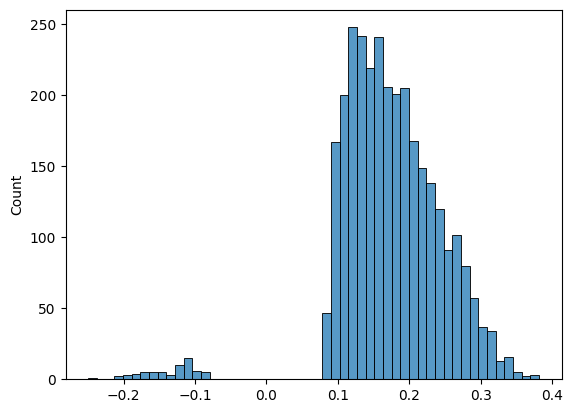

In [328]:
sns.histplot(coeffs[indices_significant])

((0.7538461538461538, 0.8500986193293886),
 (0.8153846153846154, 0.8668639053254438))

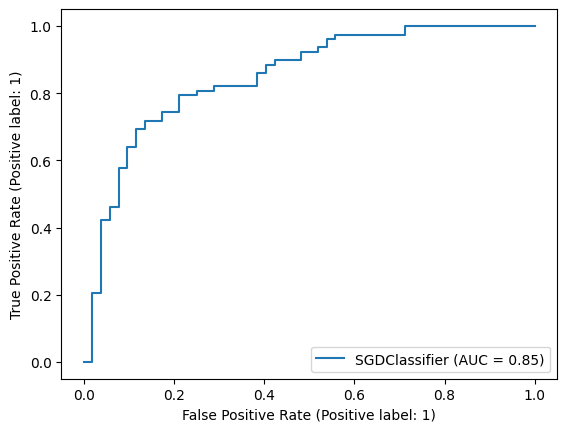

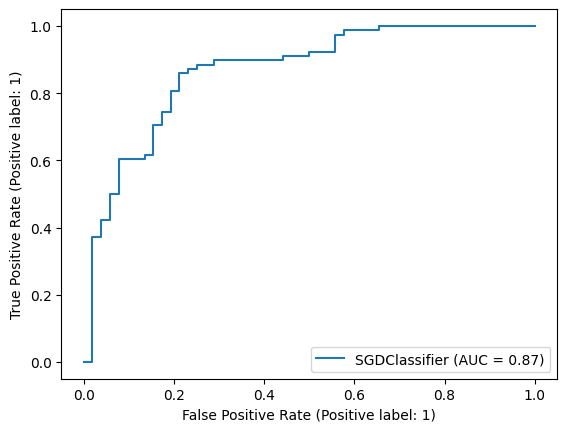

In [309]:
model = sklearn.linear_model.SGDClassifier(loss='hinge', penalty="l2", alpha=0.001, random_state=1)
model2 = sklearn.linear_model.SGDClassifier(loss='hinge', penalty="l2", alpha=0.001, random_state=1)
#x_train_culled = (x_train[:, indices_significant] * coeffs[indices_significant]).mean(axis=1).reshape(-1, 1)
#x_test_culled = (x_test[:, indices_significant] * coeffs[indices_significant]).mean(axis=1).reshape(-1, 1)

x_train_culled = x_train[:, indices_significant] * coeffs[indices_significant]
x_test_culled = x_test[:, indices_significant] * coeffs[indices_significant]

model.fit(x_train_culled, y_train)
model2.fit(x_train, y_train)

(model.score(x_test_culled, y_test), sklearn.metrics.RocCurveDisplay.from_estimator(
    model, x_test_culled, y_test, ax=None
).roc_auc), (model2.score(x_test, y_test), sklearn.metrics.RocCurveDisplay.from_estimator(
    model2, x_test, y_test, ax=None
).roc_auc)

In [310]:
import heavytools as hv

In [311]:
import sklearn.feature_selection

In [320]:
sp = sklearn.feature_selection.SelectPercentile(sklearn.feature_selection.f_classif, percentile=10)
sp.fit(x_train, y_train)

SelectPercentile()

In [321]:
sp.pvalu

{'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>,
 'percentile': 10,
 'n_features_in_': 4005,
 'scores_': array([19.79451672, 24.40069795, 18.12567652, ...,  7.23744603,
         0.68446952,  5.48532412]),
 'pvalues_': array([1.05782366e-05, 1.05990375e-06, 2.45882171e-05, ...,
        7.37212925e-03, 4.08435821e-01, 1.95575645e-02])}